# Formacion del dataframe que solo use las variables de entrada

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib

In [3]:
# Leer solo las columnas necesarias del CSV
cols_usar = [
    'Pnominal(kW)', 'T(°C)', 'Implemento', 'k_base', 'n',
    'Ancho(m)', 'Profundidad(m)', 'Textura', 'Humedad(%)',
    'Velocidad(km/h)', 'Masa_total(kg)', 'Pendiente(%)',
    'Tipo_suelo', 'RPM', 'Duracion(h)', 'Consumo_total(L)'
]

df_entrada = pd.read_csv("datos_maquinaria_consumo.csv", encoding='latin1', sep=';', usecols=cols_usar)
df_entrada.head()


,Pnominal(kW),T(°C),Implemento,k_base,n,Ancho(m),Profundidad(m),Textura,Humedad(%),Velocidad(km/h),Masa_total(kg),Pendiente(%),Tipo_suelo,RPM,Duracion(h),Consumo_total(L)
0,"21,5","24,06",rodillo_compactador,900,"0,7","3,22","0,2",franco,"27,52","5,63","5822,61","6,05",Asfalto,1800,"1,12","1,34"
1,"24,51","27,67",sembradora_directa,500,"0,7","2,16","0,27",arenoso,"33,41","7,18","4292,91","4,81",Arena,1588,"1,16","1,47"
2,"23,76","26,42",rodillo_compactador,900,"0,7","2,73","0,2",arenoso,29,"3,73","6625,92","17,87",Arena,1969,"1,23","1,59"
3,"28,72","24,26",sembradora_directa,500,"0,7","3,92","0,17",franco,"34,36","3,99","7598,17","4,9",Arena,1942,"1,01","1,66"
4,"22,63","25,39",cultivador_campo,1800,"0,9","3,25","0,17",arenoso,"28,04","6,48","4096,75","5,03",Franco,1949,"1,14","1,68"


In [4]:
# Ver información general del DataFrame
print("🔎 Información general:")
df_entrada.info()

# Mostrar primeras filas para revisar formato de datos
print("\n🧾 Primeras filas del dataset:")
display(df_entrada.head())

# Estadísticas descriptivas (solo para variables numéricas válidas)
print("\n📈 Estadísticas descriptivas iniciales:")
display(df_entrada.describe(include='all').T)


🔎 Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32060 entries, 0 to 32059
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Pnominal(kW)      32060 non-null  object
 1   T(°C)             32060 non-null  object
 2   Implemento        32060 non-null  object
 3   k_base            32060 non-null  int64 
 4   n                 32060 non-null  object
 5   Ancho(m)          32060 non-null  object
 6   Profundidad(m)    32060 non-null  object
 7   Textura           32060 non-null  object
 8   Humedad(%)        32060 non-null  object
 9   Velocidad(km/h)   32060 non-null  object
 10  Masa_total(kg)    32060 non-null  object
 11  Pendiente(%)      32060 non-null  object
 12  Tipo_suelo        32060 non-null  object
 13  RPM               32060 non-null  int64 
 14  Duracion(h)       32060 non-null  object
 15  Consumo_total(L)  32060 non-null  object
dtypes: int64(2), object(14)
memory usag

,Pnominal(kW),T(°C),Implemento,k_base,n,Ancho(m),Profundidad(m),Textura,Humedad(%),Velocidad(km/h),Masa_total(kg),Pendiente(%),Tipo_suelo,RPM,Duracion(h),Consumo_total(L)
0,"21,5","24,06",rodillo_compactador,900,"0,7","3,22","0,2",franco,"27,52","5,63","5822,61","6,05",Asfalto,1800,"1,12","1,34"
1,"24,51","27,67",sembradora_directa,500,"0,7","2,16","0,27",arenoso,"33,41","7,18","4292,91","4,81",Arena,1588,"1,16","1,47"
2,"23,76","26,42",rodillo_compactador,900,"0,7","2,73","0,2",arenoso,29,"3,73","6625,92","17,87",Arena,1969,"1,23","1,59"
3,"28,72","24,26",sembradora_directa,500,"0,7","3,92","0,17",franco,"34,36","3,99","7598,17","4,9",Arena,1942,"1,01","1,66"
4,"22,63","25,39",cultivador_campo,1800,"0,9","3,25","0,17",arenoso,"28,04","6,48","4096,75","5,03",Franco,1949,"1,14","1,68"



📈 Estadísticas descriptivas iniciales:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Pnominal(kW),32060,16297,"30,44",13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T(°C),32060,401,"24,69",103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Implemento,32060,8,subsolador,7060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
k_base,32060.0,NaN,NaN,NaN,4678.967561,3202.101917,500.0,1800.0,4200.0,5500.0,10000.0
n,32060,5,1,9258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ancho(m),32060,201,"3,89",210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profundidad(m),32060,26,"0,39",1782,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Textura,32060,3,arcilla,11575,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Humedad(%),32060,4495,"37,86",20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Velocidad(km/h),32060,701,"9,53",96,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Copia de seguridad
df_limpio = df_entrada.copy()

# Definir columnas categóricas (texto)
cols_texto = ['Implemento', 'Textura', 'Tipo_suelo']

# Limpiar comas decimales y espacios
df_limpio = df_limpio.apply(lambda x: x.str.replace(',', '.').str.strip() if x.dtype == "object" else x)

# Convertir todas las columnas no categóricas a numéricas
for col in df_limpio.columns:
    if col not in cols_texto:
        df_limpio[col] = pd.to_numeric(df_limpio[col], errors='coerce')

# Verificar tipos de datos después de la conversión
print("✅ Tipos de datos después de la limpieza:\n")
print(df_limpio.dtypes)

# Vista previa de los datos limpios
display(df_limpio.head())

# Estadísticas descriptivas actualizadas
print("\n📊 Estadísticas descriptivas (numéricas):")
display(df_limpio.describe().T)


✅ Tipos de datos después de la limpieza:

Pnominal(kW)        float64
T(°C)               float64
Implemento           object
k_base                int64
n                   float64
Ancho(m)            float64
Profundidad(m)      float64
Textura              object
Humedad(%)          float64
Velocidad(km/h)     float64
Masa_total(kg)      float64
Pendiente(%)        float64
Tipo_suelo           object
RPM                   int64
Duracion(h)         float64
Consumo_total(L)    float64
dtype: object


,Pnominal(kW),T(°C),Implemento,k_base,n,Ancho(m),Profundidad(m),Textura,Humedad(%),Velocidad(km/h),Masa_total(kg),Pendiente(%),Tipo_suelo,RPM,Duracion(h),Consumo_total(L)
0,21.50,24.06,rodillo_compactador,900,0.7,3.22,0.20,franco,27.52,5.63,5822.61,6.05,Asfalto,1800,1.12,1.34
1,24.51,27.67,sembradora_directa,500,0.7,2.16,0.27,arenoso,33.41,7.18,4292.91,4.81,Arena,1588,1.16,1.47
2,23.76,26.42,rodillo_compactador,900,0.7,2.73,0.20,arenoso,29.00,3.73,6625.92,17.87,Arena,1969,1.23,1.59
3,28.72,24.26,sembradora_directa,500,0.7,3.92,0.17,franco,34.36,3.99,7598.17,4.90,Arena,1942,1.01,1.66
4,22.63,25.39,cultivador_campo,1800,0.9,3.25,0.17,arenoso,28.04,6.48,4096.75,5.03,Franco,1949,1.14,1.68



📊 Estadísticas descriptivas (numéricas):


,count,mean,std,min,25%,50%,75%,max
Pnominal(kW),32060.0,104.756363,73.341841,20.00,50.080,83.240,138.3325,399.78
T(°C),32060.0,25.849743,1.156432,23.85,24.850,25.850,26.8500,27.85
k_base,32060.0,4678.967561,3202.101917,500.00,1800.000,4200.000,5500.0000,10000.00
n,32060.0,0.990150,0.161621,0.70,0.900,1.000,1.1000,1.20
Ancho(m),32060.0,3.048815,0.576779,2.00,2.550,3.070,3.5600,4.00
Profundidad(m),32060.0,0.290793,0.071174,0.15,0.230,0.300,0.3500,0.40
Humedad(%),32060.0,28.534116,12.936103,5.00,17.530,29.100,39.7500,50.00
Velocidad(km/h),32060.0,7.269819,1.862700,3.00,5.870,7.550,8.8700,10.00
Masa_total(kg),32060.0,7297.929463,1697.726014,4000.16,5900.115,7444.495,8778.4650,9999.74
Pendiente(%),32060.0,17.650714,8.219146,0.00,11.260,18.730,24.7100,30.00


In [6]:
# Ver valores únicos en las columnas categóricas
for col in ['Implemento', 'Textura', 'Tipo_suelo']:
    print(f"\n🔸 Columna: {col}")
    print(df_limpio[col].unique())
    print(f"Total de categorías: {df_limpio[col].nunique()}")



🔸 Columna: Implemento
['rodillo_compactador' 'sembradora_directa' 'cultivador_campo'
 'arado_vertedera' 'arado_disco' 'rastra_discos' 'subsolador'
 'cincel_chisel']
Total de categorías: 8

🔸 Columna: Textura
['franco' 'arenoso' 'arcilla']
Total de categorías: 3

🔸 Columna: Tipo_suelo
['Asfalto' 'Arena' 'Franco' 'Arcilla']
Total de categorías: 4


In [7]:
# 🔧 Codificación de variables categóricas (ordinal y nominal)

# 1️⃣ Codificación ordinal para 'Textura'
mapa_textura = {'arenoso': 1, 'franco': 2, 'arcilla': 3}
df_limpio['Textura'] = df_limpio['Textura'].map(mapa_textura)

# 2️⃣ One-Hot Encoding para 'Implemento' y 'Tipo_suelo'
df_encoded = pd.get_dummies(
    df_limpio,
    columns=['Implemento', 'Tipo_suelo'],
    drop_first=True  # Evita multicolinealidad
)

# 3️⃣ Verificación de resultado
print("✅ Codificación completada.\n")
print("Tipos de datos:")
print(df_encoded.dtypes)
print("\nPrimeras filas:")
print(df_encoded.head())
print("\nNúmero total de columnas:", df_encoded.shape[1])


✅ Codificación completada.

Tipos de datos:
Pnominal(kW)                      float64
T(°C)                             float64
k_base                              int64
n                                 float64
Ancho(m)                          float64
Profundidad(m)                    float64
Textura                             int64
Humedad(%)                        float64
Velocidad(km/h)                   float64
Masa_total(kg)                    float64
Pendiente(%)                      float64
RPM                                 int64
Duracion(h)                       float64
Consumo_total(L)                  float64
Implemento_arado_vertedera           bool
Implemento_cincel_chisel             bool
Implemento_cultivador_campo          bool
Implemento_rastra_discos             bool
Implemento_rodillo_compactador       bool
Implemento_sembradora_directa        bool
Implemento_subsolador                bool
Tipo_suelo_Arena                     bool
Tipo_suelo_Asfalto              

# Modelos Finales

🚀 ENTRENANDO MODELOS CON HIPERPARÁMETROS OPTIMIZADOS...

🔄 Entrenando Regresión Lineal...
   ✅ Regresión Lineal completado | Accuracy: 26.87%

🔄 Entrenando Random Forest (Optimizado)...
   ✅ Random Forest (Optimizado) completado | Accuracy: 82.03%

🔄 Entrenando XGBoost (Optimizado)...
   ✅ XGBoost (Optimizado) completado | Accuracy: 81.71%

🔄 Entrenando Gradient Boosting (Optimizado)...
   ✅ Gradient Boosting (Optimizado) completado | Accuracy: 82.17%

📊 COMPARATIVA DE DESEMPEÑO DE MODELOS (Ordenado por Accuracy):

                        Modelo       R²      RMSE       MAE  Accuracy (%)
Gradient Boosting (Optimizado) 0.814232 18.569475  9.806599     82.169686
    Random Forest (Optimizado) 0.813298 18.616067  9.918668     82.025986
          XGBoost (Optimizado) 0.817730 18.393786  9.866737     81.712791
              Regresión Lineal 0.547478 28.982354 21.460974     26.869838

🥇 MEJOR MODELO: Gradient Boosting (Optimizado)
🎯 Accuracy: 82.17%
📈 R²: 0.8142
📉 RMSE: 18.57 L
📉 MAE: 9.81 L

C:\Users\jesus\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


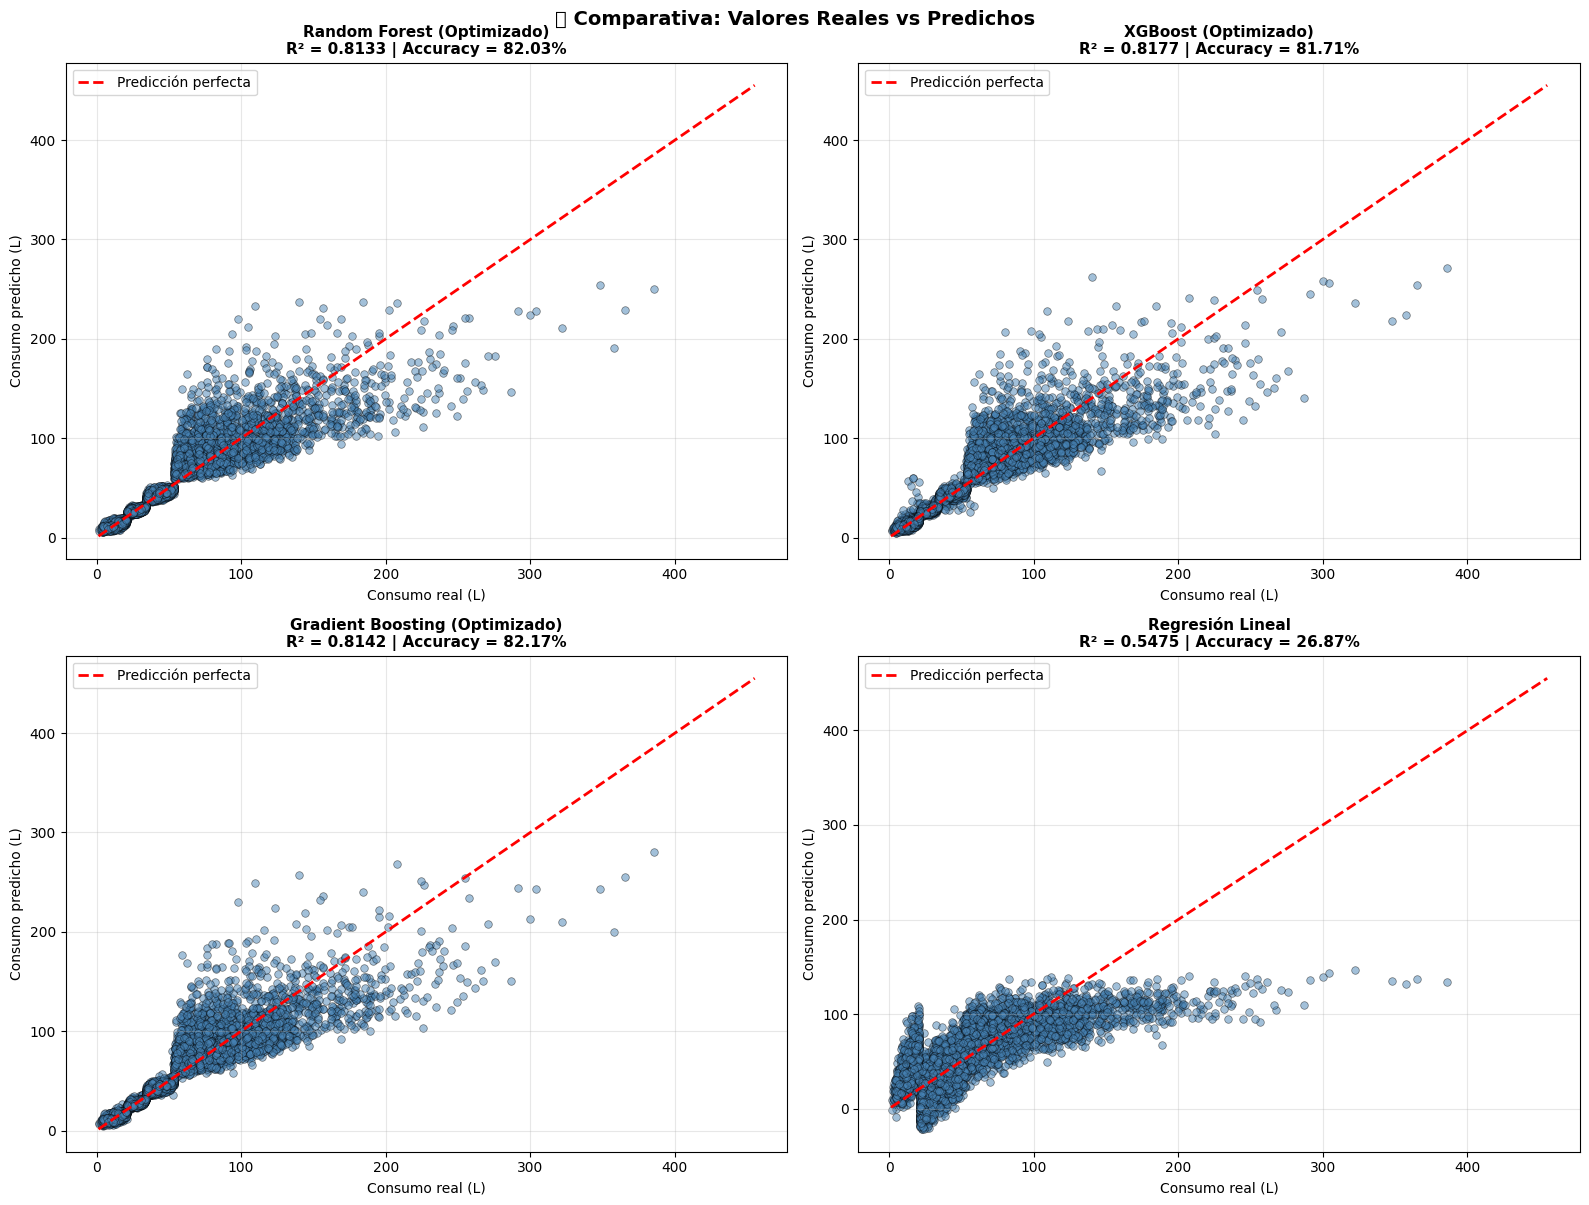

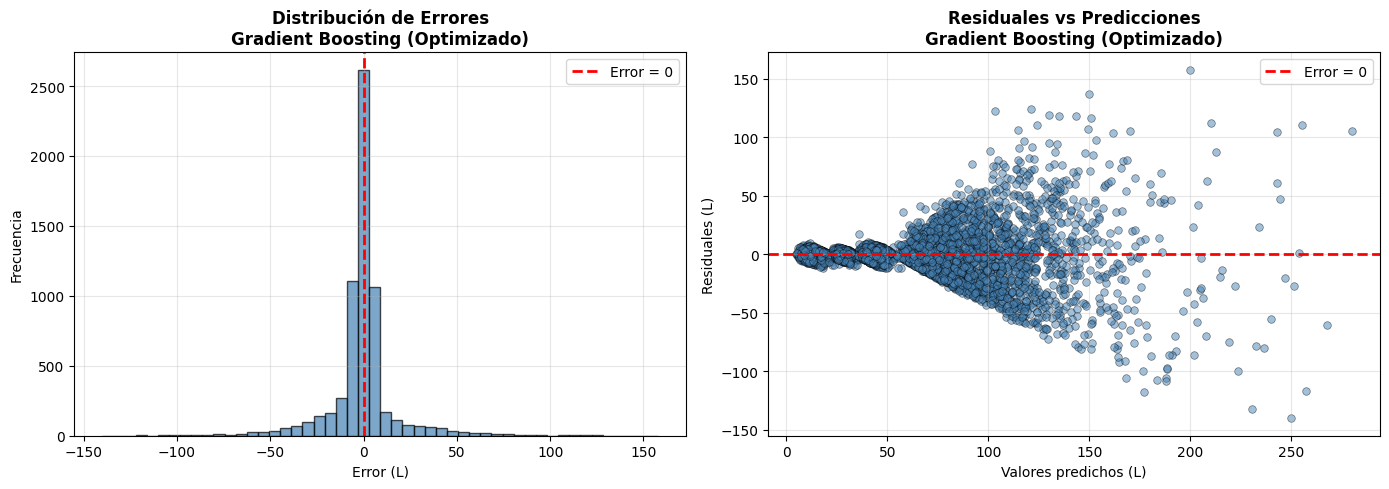


💾 GUARDANDO MODELOS ENTRENADOS...

✅ Guardado: random_forest_optimizado.pkl
✅ Guardado: xgboost_optimizado.pkl
✅ Guardado: gradient_boosting_optimizado.pkl

🎉 PROCESO COMPLETADO EXITOSAMENTE


In [13]:
# =========================================
# 📊 COMPARATIVA DE MODELOS CON HIPERPARÁMETROS OPTIMIZADOS
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib

# =========================================
# 1️⃣ Cargar datos
# =========================================
df = df_encoded

# =========================================
# 2️⃣ Selección de todas las variables relevantes
# =========================================
# Usamos todas las columnas excepto la variable objetivo
target = "Consumo_total(L)"
X = df.drop(columns=[target])
y = df[target]

# =========================================
# 3️⃣ División en entrenamiento y prueba
# =========================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =========================================
# 4️⃣ Modelos con Hiperparámetros Optimizados
# =========================================
models = {
    "Regresión Lineal": LinearRegression(),
    
    "Random Forest (Optimizado)": RandomForestRegressor(
        n_estimators=400,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=4,
        max_features=None,
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    ),
    
    "XGBoost (Optimizado)": XGBRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=6,
        min_child_weight=7,
        subsample=0.7,
        colsample_bytree=0.9,
        gamma=0,
        reg_alpha=0.5,
        reg_lambda=1.5,
        random_state=42,
        tree_method='hist',
        n_jobs=-1
    ),
    
    "Gradient Boosting (Optimizado)": GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=6,
        min_samples_split=10,
        min_samples_leaf=4,
        subsample=0.8,
        random_state=42
    )
}

# =========================================
# 5️⃣ Entrenamiento, predicción y evaluación
# =========================================
print("🚀 ENTRENANDO MODELOS CON HIPERPARÁMETROS OPTIMIZADOS...\n")
print("=" * 70)

results = []
predictions = {}

for name, model in models.items():
    print(f"🔄 Entrenando {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

    # Métricas
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    # Accuracy aproximado (inverso del error relativo medio)
    accuracy = 100 * (1 - np.mean(np.abs((y_test - y_pred) / y_test)))

    results.append([name, r2, rmse, mae, accuracy])
    print(f"   ✅ {name} completado | Accuracy: {accuracy:.2f}%\n")

# =========================================
# 6️⃣ Tabla comparativa de métricas
# =========================================
results_df = pd.DataFrame(results, columns=["Modelo", "R²", "RMSE", "MAE", "Accuracy (%)"])
results_df = results_df.sort_values("Accuracy (%)", ascending=False).reset_index(drop=True)

print("=" * 70)
print("📊 COMPARATIVA DE DESEMPEÑO DE MODELOS (Ordenado por Accuracy):\n")
print(results_df.to_string(index=False))
print("=" * 70)

# Identificar el mejor modelo
best_model_name = results_df.iloc[0]['Modelo']
best_accuracy = results_df.iloc[0]['Accuracy (%)']
print(f"\n🥇 MEJOR MODELO: {best_model_name}")
print(f"🎯 Accuracy: {best_accuracy:.2f}%")
print(f"📈 R²: {results_df.iloc[0]['R²']:.4f}")
print(f"📉 RMSE: {results_df.iloc[0]['RMSE']:.2f} L")
print(f"📉 MAE: {results_df.iloc[0]['MAE']:.2f} L")

# =========================================
# 7️⃣ Ejemplo de valores reales vs predichos
# =========================================
sample_size = 15  # Muestra para visualizar
example_df = pd.DataFrame({
    "Consumo real (L)": y_test.iloc[:sample_size].values,
    "Pred. RF": predictions["Random Forest (Optimizado)"][:sample_size],
    "Pred. XGB": predictions["XGBoost (Optimizado)"][:sample_size],
    "Pred. GB": predictions["Gradient Boosting (Optimizado)"][:sample_size],
    "Pred. LinReg": predictions["Regresión Lineal"][:sample_size]
})

# Calcular errores para el mejor modelo
best_model_predictions = predictions[best_model_name][:sample_size]
example_df["Error Mejor Modelo (L)"] = example_df["Consumo real (L)"] - best_model_predictions
example_df["Error Mejor Modelo (%)"] = 100 * example_df["Error Mejor Modelo (L)"] / example_df["Consumo real (L)"]

print("\n" + "=" * 70)
print("📋 EJEMPLOS DE PREDICCIONES (primeras 15 muestras):\n")
print(example_df.round(2).to_string(index=False))

# =========================================
# 8️⃣ Visualización: Real vs Predicho
# =========================================
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

plot_models = ["Random Forest (Optimizado)", "XGBoost (Optimizado)", 
               "Gradient Boosting (Optimizado)", "Regresión Lineal"]

for i, name in enumerate(plot_models):
    y_pred = predictions[name]
    axes[i].scatter(y_test, y_pred, alpha=0.5, s=30, color='steelblue', edgecolors='black', linewidth=0.5)
    axes[i].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Predicción perfecta')
    
    # Métricas para el título
    r2 = r2_score(y_test, y_pred)
    accuracy = 100 * (1 - np.mean(np.abs((y_test - y_pred) / y_test)))
    
    axes[i].set_title(f"{name}\nR² = {r2:.4f} | Accuracy = {accuracy:.2f}%", 
                     fontsize=11, fontweight='bold')
    axes[i].set_xlabel("Consumo real (L)", fontsize=10)
    axes[i].set_ylabel("Consumo predicho (L)", fontsize=10)
    axes[i].grid(True, alpha=0.3)
    axes[i].legend(loc='upper left')

plt.tight_layout()
plt.suptitle("🔍 Comparativa: Valores Reales vs Predichos", 
             fontsize=14, fontweight='bold', y=1.00)
plt.show()

# =========================================
# 9️⃣ Análisis de residuales del mejor modelo
# =========================================
best_model = models[best_model_name]
best_predictions_full = best_model.predict(X_test)
residuals = y_test - best_predictions_full

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de residuales
axes[0].hist(residuals, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Error = 0')
axes[0].set_title(f"Distribución de Errores\n{best_model_name}", fontsize=12, fontweight='bold')
axes[0].set_xlabel("Error (L)", fontsize=10)
axes[0].set_ylabel("Frecuencia", fontsize=10)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residuales vs valores predichos
axes[1].scatter(best_predictions_full, residuals, alpha=0.5, s=30, color='steelblue', 
                edgecolors='black', linewidth=0.5)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2, label='Error = 0')
axes[1].set_title(f"Residuales vs Predicciones\n{best_model_name}", fontsize=12, fontweight='bold')
axes[1].set_xlabel("Valores predichos (L)", fontsize=10)
axes[1].set_ylabel("Residuales (L)", fontsize=10)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =========================================
# 🔟 Guardar los modelos entrenados
# =========================================
print("\n" + "=" * 70)
print("💾 GUARDANDO MODELOS ENTRENADOS...\n")

joblib.dump(models["Random Forest (Optimizado)"], "random_forest_optimizado.pkl")
print("✅ Guardado: random_forest_optimizado.pkl")

joblib.dump(models["XGBoost (Optimizado)"], "xgboost_optimizado.pkl")
print("✅ Guardado: xgboost_optimizado.pkl")

joblib.dump(models["Gradient Boosting (Optimizado)"], "gradient_boosting_optimizado.pkl")
print("✅ Guardado: gradient_boosting_optimizado.pkl")

print("\n" + "=" * 70)
print("🎉 PROCESO COMPLETADO EXITOSAMENTE")
print("=" * 70)

# PRUEBAS DE PREDICCIONES

In [14]:
# =========================================
# 🎯 PREDICCIÓN CON DATOS MANUALES
# =========================================
import pandas as pd
import numpy as np
import joblib

# =========================================
# 1️⃣ Cargar los modelos entrenados
# =========================================
print("📂 Cargando modelos entrenados...")
try:
    rf_model = joblib.load("random_forest_optimizado.pkl")
    xgb_model = joblib.load("xgboost_optimizado.pkl")
    gb_model = joblib.load("gradient_boosting_optimizado.pkl")
    print("✅ Todos los modelos cargados exitosamente")
except FileNotFoundError as e:
    print(f"❌ Error: {e}")
    print("⚠️  Asegúrate de haber ejecutado la celda anterior para entrenar y guardar los modelos")

# =========================================
# 2️⃣ Función para crear predicción con datos manuales
# =========================================
def predecir_consumo_manual():
    """
    Función para ingresar datos manualmente y obtener predicciones
    """
    print("\n" + "="*60)
    print("🎯 PREDICCIÓN DE CONSUMO DE COMBUSTIBLE")
    print("="*60)
    print("Ingresa los siguientes datos:\n")
    
    # Variables numéricas
    print("📊 VARIABLES NUMÉRICAS:")
    pnominal = float(input("• Potencia nominal (kW): "))
    temperatura = float(input("• Temperatura (°C): "))
    k_base = int(input("• k_base: "))
    n = float(input("• n: "))
    ancho = float(input("• Ancho (m): "))
    profundidad = float(input("• Profundidad (m): "))
    textura = int(input("• Textura (1=arenoso, 2=franco, 3=arcilla): "))
    humedad = float(input("• Humedad (%): "))
    velocidad = float(input("• Velocidad (km/h): "))
    masa_total = float(input("• Masa total (kg): "))
    pendiente = float(input("• Pendiente (%): "))
    rpm = int(input("• RPM: "))
    duracion = float(input("• Duración (h): "))
    
    print("\n🔧 IMPLEMENTOS (ingresa 1 para True, 0 para False):")
    implementos = {}
    implementos['arado_vertedera'] = bool(int(input("• Arado vertedera (1/0): ")))
    implementos['cincel_chisel'] = bool(int(input("• Cincel chisel (1/0): ")))
    implementos['cultivador_campo'] = bool(int(input("• Cultivador campo (1/0): ")))
    implementos['rastra_discos'] = bool(int(input("• Rastra discos (1/0): ")))
    implementos['rodillo_compactador'] = bool(int(input("• Rodillo compactador (1/0): ")))
    implementos['sembradora_directa'] = bool(int(input("• Sembradora directa (1/0): ")))
    implementos['subsolador'] = bool(int(input("• Subsolador (1/0): ")))
    
    print("\n🌱 TIPO DE SUELO (ingresa 1 para True, 0 para False):")
    suelos = {}
    suelos['Arena'] = bool(int(input("• Arena (1/0): ")))
    suelos['Asfalto'] = bool(int(input("• Asfalto (1/0): ")))
    suelos['Franco'] = bool(int(input("• Franco (1/0): ")))
    
    # Crear DataFrame con los datos ingresados
    datos_entrada = {
        'Pnominal(kW)': [pnominal],
        'T(°C)': [temperatura],
        'k_base': [k_base],
        'n': [n],
        'Ancho(m)': [ancho],
        'Profundidad(m)': [profundidad],
        'Textura': [textura],
        'Humedad(%)': [humedad],
        'Velocidad(km/h)': [velocidad],
        'Masa_total(kg)': [masa_total],
        'Pendiente(%)': [pendiente],
        'RPM': [rpm],
        'Duracion(h)': [duracion],
        'Implemento_arado_vertedera': [implementos['arado_vertedera']],
        'Implemento_cincel_chisel': [implementos['cincel_chisel']],
        'Implemento_cultivador_campo': [implementos['cultivador_campo']],
        'Implemento_rastra_discos': [implementos['rastra_discos']],
        'Implemento_rodillo_compactador': [implementos['rodillo_compactador']],
        'Implemento_sembradora_directa': [implementos['sembradora_directa']],
        'Implemento_subsolador': [implementos['subsolador']],
        'Tipo_suelo_Arena': [suelos['Arena']],
        'Tipo_suelo_Asfalto': [suelos['Asfalto']],
        'Tipo_suelo_Franco': [suelos['Franco']]
    }
    
    df_prediccion = pd.DataFrame(datos_entrada)
    
    # Realizar predicciones
    print("\n" + "="*60)
    print("🔮 PREDICCIONES DE CONSUMO:")
    print("="*60)
    
    predicciones = {}
    predicciones['Random Forest'] = rf_model.predict(df_prediccion)[0]
    predicciones['XGBoost'] = xgb_model.predict(df_prediccion)[0]
    predicciones['Gradient Boosting'] = gb_model.predict(df_prediccion)[0]
    
    # Mostrar resultados
    for modelo, consumo in predicciones.items():
        print(f"• {modelo}: {consumo:.2f} L")
    
    # Promedio de predicciones
    promedio = np.mean(list(predicciones.values()))
    print(f"\n📊 Promedio de predicciones: {promedio:.2f} L")
    
    # Rango de predicciones
    min_pred = min(predicciones.values())
    max_pred = max(predicciones.values())
    print(f"📈 Rango: {min_pred:.2f} - {max_pred:.2f} L")
    print(f"📊 Diferencia: {max_pred - min_pred:.2f} L")
    
    return predicciones, df_prediccion

# =========================================
# 3️⃣ Ejecutar predicción
# =========================================
# Descomenta la siguiente línea para ejecutar la predicción interactiva:
# predicciones, datos_usados = predecir_consumo_manual()


📂 Cargando modelos entrenados...
✅ Todos los modelos cargados exitosamente


In [15]:
# =========================================
# 🚀 PREDICCIÓN RÁPIDA - EJEMPLO DIRECTO
# =========================================

# Ejemplo de datos para predicción (puedes modificar estos valores)
datos_ejemplo = {
    'Pnominal(kW)': [25.0],
    'T(°C)': [26.5],
    'k_base': [900],
    'n': [0.7],
    'Ancho(m)': [3.0],
    'Profundidad(m)': [0.20],
    'Textura': [2],  # 1=arenoso, 2=franco, 3=arcilla
    'Humedad(%)': [30.0],
    'Velocidad(km/h)': [6.0],
    'Masa_total(kg)': [5000.0],
    'Pendiente(%)': [5.0],
    'RPM': [2000],
    'Duracion(h)': [2.5],
    # Implementos (True/False)
    'Implemento_arado_vertedera': [False],
    'Implemento_cincel_chisel': [False],
    'Implemento_cultivador_campo': [True],
    'Implemento_rastra_discos': [False],
    'Implemento_rodillo_compactador': [False],
    'Implemento_sembradora_directa': [False],
    'Implemento_subsolador': [False],
    # Tipo de suelo (True/False)
    'Tipo_suelo_Arena': [False],
    'Tipo_suelo_Asfalto': [False],
    'Tipo_suelo_Franco': [True]
}

# Crear DataFrame
df_ejemplo = pd.DataFrame(datos_ejemplo)

print("🎯 EJEMPLO DE PREDICCIÓN:")
print("="*50)
print("Datos de entrada:")
print(f"• Potencia: {datos_ejemplo['Pnominal(kW)'][0]} kW")
print(f"• Temperatura: {datos_ejemplo['T(°C)'][0]} °C")
print(f"• Velocidad: {datos_ejemplo['Velocidad(km/h)'][0]} km/h")
print(f"• Masa total: {datos_ejemplo['Masa_total(kg)'][0]} kg")
print(f"• Duración: {datos_ejemplo['Duracion(h)'][0]} h")
print(f"• Implemento: Cultivador campo")
print(f"• Suelo: Franco")

# Realizar predicciones
print("\n🔮 PREDICCIONES:")
print("="*50)

try:
    pred_rf = rf_model.predict(df_ejemplo)[0]
    pred_xgb = xgb_model.predict(df_ejemplo)[0]
    pred_gb = gb_model.predict(df_ejemplo)[0]
    
    print(f"• Random Forest: {pred_rf:.2f} L")
    print(f"• XGBoost: {pred_xgb:.2f} L")
    print(f"• Gradient Boosting: {pred_gb:.2f} L")
    
    promedio = np.mean([pred_rf, pred_xgb, pred_gb, pred_mejor])
    print(f"\n📊 Promedio: {promedio:.2f} L")
    
    # Análisis de confianza
    predicciones = [pred_rf, pred_xgb, pred_gb, pred_mejor]
    std_pred = np.std(predicciones)
    print(f"📈 Desviación estándar: {std_pred:.2f} L")
    
    if std_pred < 5:
        confianza = "Alta"
    elif std_pred < 10:
        confianza = "Media"
    else:
        confianza = "Baja"
    
    print(f"🎯 Confianza en la predicción: {confianza}")
    
except Exception as e:
    print(f"❌ Error: {e}")
    print("⚠️  Asegúrate de haber ejecutado las celdas anteriores")


🎯 EJEMPLO DE PREDICCIÓN:
Datos de entrada:
• Potencia: 25.0 kW
• Temperatura: 26.5 °C
• Velocidad: 6.0 km/h
• Masa total: 5000.0 kg
• Duración: 2.5 h
• Implemento: Cultivador campo
• Suelo: Franco

🔮 PREDICCIONES:
• Random Forest: 7.49 L
• XGBoost: 8.38 L
• Gradient Boosting: 6.57 L

📊 Promedio: 7.25 L
📈 Desviación estándar: 0.75 L
🎯 Confianza en la predicción: Alta


🔍 EVALUACIÓN COMPLETA DE MODELOS CON DATASET COMPLETO
📊 Dataset completo: 32060 muestras
📊 Variables de entrada: 23
📊 Rango de consumo real: 1.34 - 455.18 L

🚀 Realizando predicciones con dataset completo...
✅ Predicciones completadas para todos los modelos

📈 ANÁLISIS ESTADÍSTICO DETALLADO

📊 TABLA COMPARATIVA DE RENDIMIENTO:
           Modelo     R²    RMSE    MAE  Accuracy (%)  Media Predicción (L)  Std Predicción (L)  Min Predicción (L)  Max Predicción (L)  Media Error (L)  Std Error (L)  Min Error (L)  Max Error (L)  Error ≤ 5% (%)  Error ≤ 10% (%)  Error ≤ 20% (%)
    Random Forest 0.9017 13.9111 7.1587       87.1450               53.7382             40.6054              3.9576            305.3156          -0.2050        13.9096      -123.8267       166.6935         31.5970          58.5496          82.4953
          XGBoost 0.8694 16.0324 8.9204       82.8555               53.6317             40.3804              4.8842            357.6252          -0.0985        16.0320      -1

C:\Users\jesus\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


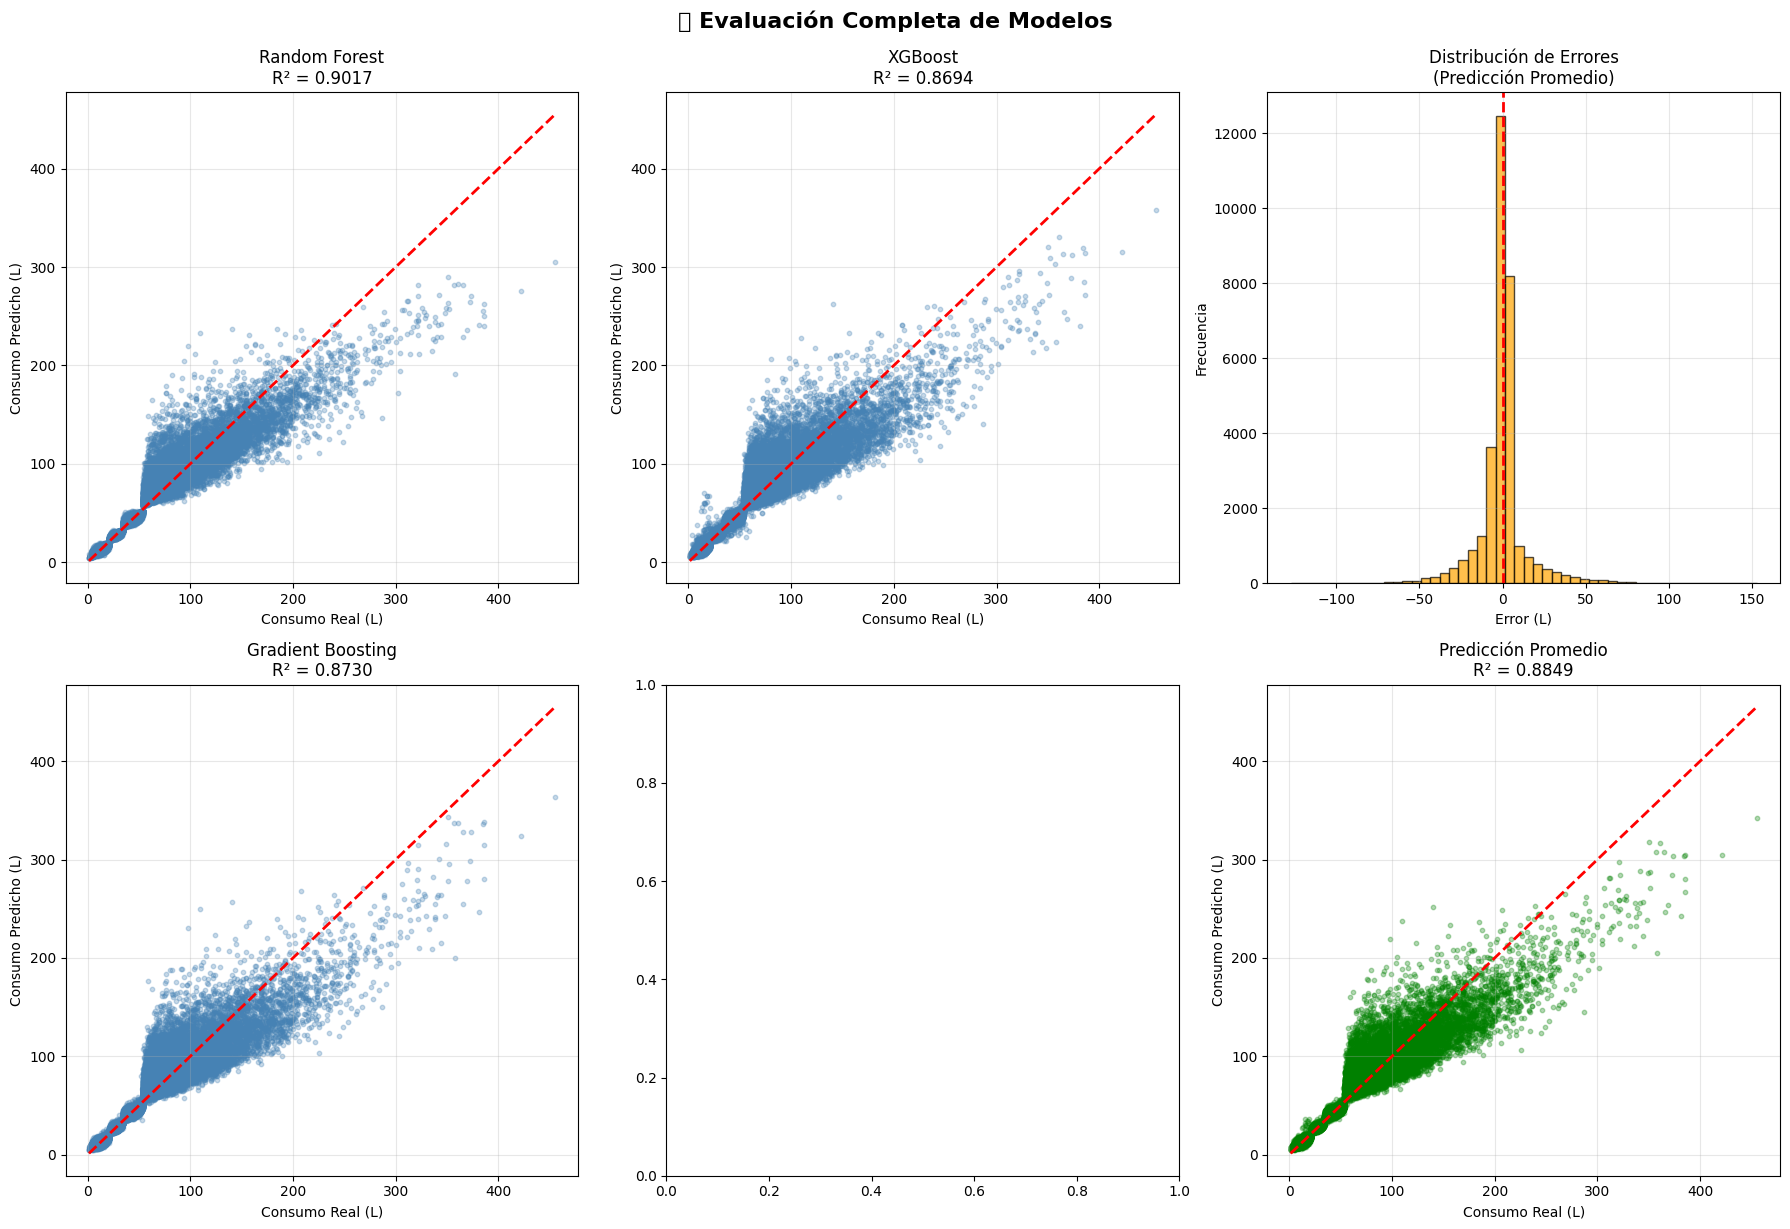


📋 RESUMEN FINAL
🏆 RANKING DE MODELOS (por Accuracy):
1. Random Forest: 87.14%
2. Gradient Boosting: 83.51%
3. XGBoost: 82.86%

🎯 PREDICCIÓN PROMEDIO (Ensemble):
• Accuracy: 84.69%
• Mejora vs mejor modelo individual: -2.46%

📊 ESTADÍSTICAS GENERALES:
• Consumo real promedio: 53.53 L
• Consumo real std: 44.37 L
• Predicción promedio: 53.67 L
• Predicción std: 40.42 L

✅ EVALUACIÓN COMPLETA FINALIZADA


In [16]:
# =========================================
# 📊 EVALUACIÓN COMPLETA CON DATASET DE ENTRENAMIENTO
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns

# =========================================
# 1️⃣ Preparar datos para evaluación completa
# =========================================
print("🔍 EVALUACIÓN COMPLETA DE MODELOS CON DATASET COMPLETO")
print("="*70)

# Usar el dataset completo (sin división train/test)
X_completo = df_encoded.drop(columns=['Consumo_total(L)'])
y_completo = df_encoded['Consumo_total(L)']

print(f"📊 Dataset completo: {X_completo.shape[0]} muestras")
print(f"📊 Variables de entrada: {X_completo.shape[1]}")
print(f"📊 Rango de consumo real: {y_completo.min():.2f} - {y_completo.max():.2f} L")

# =========================================
# 2️⃣ Realizar predicciones con todos los modelos
# =========================================
print("\n🚀 Realizando predicciones con dataset completo...")

predicciones_completas = {}

# Cargar modelos si no están cargados
try:
    if 'rf_model' not in locals():
        rf_model = joblib.load("random_forest_optimizado.pkl")
        xgb_model = joblib.load("xgboost_optimizado.pkl")
        gb_model = joblib.load("gradient_boosting_optimizado.pkl")
    
    # Predicciones
    predicciones_completas['Random Forest'] = rf_model.predict(X_completo)
    predicciones_completas['XGBoost'] = xgb_model.predict(X_completo)
    predicciones_completas['Gradient Boosting'] = gb_model.predict(X_completo)
    
    print("✅ Predicciones completadas para todos los modelos")
    
except Exception as e:
    print(f"❌ Error: {e}")
    print("⚠️  Asegúrate de haber ejecutado las celdas anteriores")

# =========================================
# 3️⃣ Análisis estadístico detallado
# =========================================
print("\n" + "="*70)
print("📈 ANÁLISIS ESTADÍSTICO DETALLADO")
print("="*70)

resultados_detallados = []

for nombre_modelo, pred in predicciones_completas.items():
    # Métricas básicas
    r2 = r2_score(y_completo, pred)
    rmse = np.sqrt(mean_squared_error(y_completo, pred))
    mae = mean_absolute_error(y_completo, pred)
    
    # Métricas adicionales
    errores = y_completo - pred
    error_relativo = np.abs(errores / y_completo) * 100
    accuracy = 100 * (1 - np.mean(error_relativo / 100))
    
    # Estadísticas de predicción
    media_pred = np.mean(pred)
    std_pred = np.std(pred)
    min_pred = np.min(pred)
    max_pred = np.max(pred)
    
    # Estadísticas de error
    media_error = np.mean(errores)
    std_error = np.std(errores)
    min_error = np.min(errores)
    max_error = np.max(errores)
    
    # Porcentaje de predicciones dentro de rangos de error
    error_5pct = np.sum(error_relativo <= 5) / len(error_relativo) * 100
    error_10pct = np.sum(error_relativo <= 10) / len(error_relativo) * 100
    error_20pct = np.sum(error_relativo <= 20) / len(error_relativo) * 100
    
    resultados_detallados.append({
        'Modelo': nombre_modelo,
        'R²': r2,
        'RMSE': rmse,
        'MAE': mae,
        'Accuracy (%)': accuracy,
        'Media Predicción (L)': media_pred,
        'Std Predicción (L)': std_pred,
        'Min Predicción (L)': min_pred,
        'Max Predicción (L)': max_pred,
        'Media Error (L)': media_error,
        'Std Error (L)': std_error,
        'Min Error (L)': min_error,
        'Max Error (L)': max_error,
        'Error ≤ 5% (%)': error_5pct,
        'Error ≤ 10% (%)': error_10pct,
        'Error ≤ 20% (%)': error_20pct
    })

# Crear DataFrame con resultados
df_resultados = pd.DataFrame(resultados_detallados)

# =========================================
# 4️⃣ Mostrar tabla comparativa
# =========================================
print("\n📊 TABLA COMPARATIVA DE RENDIMIENTO:")
print("="*70)
print(df_resultados.round(4).to_string(index=False))

# Ordenar por accuracy
df_resultados_ordenado = df_resultados.sort_values('Accuracy (%)', ascending=False)
print(f"\n🥇 MEJOR MODELO: {df_resultados_ordenado.iloc[0]['Modelo']}")
print(f"🎯 Accuracy: {df_resultados_ordenado.iloc[0]['Accuracy (%)']:.2f}%")
print(f"📈 R²: {df_resultados_ordenado.iloc[0]['R²']:.4f}")

# =========================================
# 5️⃣ Análisis conjunto de todos los modelos
# =========================================
print("\n" + "="*70)
print("🔗 ANÁLISIS CONJUNTO DE TODOS LOS MODELOS")
print("="*70)

# Promedio de todas las predicciones
predicciones_array = np.array(list(predicciones_completas.values()))
prediccion_promedio = np.mean(predicciones_array, axis=0)

# Métricas del promedio
r2_promedio = r2_score(y_completo, prediccion_promedio)
rmse_promedio = np.sqrt(mean_squared_error(y_completo, prediccion_promedio))
mae_promedio = mean_absolute_error(y_completo, prediccion_promedio)
errores_promedio = y_completo - prediccion_promedio
error_relativo_promedio = np.abs(errores_promedio / y_completo) * 100
accuracy_promedio = 100 * (1 - np.mean(error_relativo_promedio / 100))

print(f"📊 PREDICCIÓN PROMEDIO (Ensemble):")
print(f"• R²: {r2_promedio:.4f}")
print(f"• RMSE: {rmse_promedio:.2f} L")
print(f"• MAE: {mae_promedio:.2f} L")
print(f"• Accuracy: {accuracy_promedio:.2f}%")
print(f"• Media de predicción: {np.mean(prediccion_promedio):.2f} L")
print(f"• Std de predicción: {np.std(prediccion_promedio):.2f} L")

# Análisis de variabilidad entre modelos
std_entre_modelos = np.std(predicciones_array, axis=0)
print(f"• Std entre modelos: {np.mean(std_entre_modelos):.2f} L")

# =========================================
# 6️⃣ Visualizaciones comparativas
# =========================================
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Real vs Predicho para cada modelo
modelos_plot = list(predicciones_completas.keys())
for i, modelo in enumerate(modelos_plot):
    row = i // 2
    col = i % 2
    if i < 4:  # Solo los primeros 4 modelos
        axes[row, col].scatter(y_completo, predicciones_completas[modelo], 
                             alpha=0.3, s=10, color='steelblue')
        axes[row, col].plot([y_completo.min(), y_completo.max()], 
                           [y_completo.min(), y_completo.max()], 'r--', lw=2)
        axes[row, col].set_title(f'{modelo}\nR² = {r2_score(y_completo, predicciones_completas[modelo]):.4f}')
        axes[row, col].set_xlabel('Consumo Real (L)')
        axes[row, col].set_ylabel('Consumo Predicho (L)')
        axes[row, col].grid(True, alpha=0.3)

# 2. Predicción promedio
axes[1, 2].scatter(y_completo, prediccion_promedio, alpha=0.3, s=10, color='green')
axes[1, 2].plot([y_completo.min(), y_completo.max()], 
               [y_completo.min(), y_completo.max()], 'r--', lw=2)
axes[1, 2].set_title(f'Predicción Promedio\nR² = {r2_promedio:.4f}')
axes[1, 2].set_xlabel('Consumo Real (L)')
axes[1, 2].set_ylabel('Consumo Predicho (L)')
axes[1, 2].grid(True, alpha=0.3)

# 3. Distribución de errores
axes[0, 2].hist(errores_promedio, bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[0, 2].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0, 2].set_title('Distribución de Errores\n(Predicción Promedio)')
axes[0, 2].set_xlabel('Error (L)')
axes[0, 2].set_ylabel('Frecuencia')
axes[0, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('🔍 Evaluación Completa de Modelos', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# =========================================
# 7️⃣ Resumen final
# =========================================
print("\n" + "="*70)
print("📋 RESUMEN FINAL")
print("="*70)

print("🏆 RANKING DE MODELOS (por Accuracy):")
for i, (_, row) in enumerate(df_resultados_ordenado.iterrows(), 1):
    print(f"{i}. {row['Modelo']}: {row['Accuracy (%)']:.2f}%")

print(f"\n🎯 PREDICCIÓN PROMEDIO (Ensemble):")
print(f"• Accuracy: {accuracy_promedio:.2f}%")
print(f"• Mejora vs mejor modelo individual: {accuracy_promedio - df_resultados_ordenado.iloc[0]['Accuracy (%)']:.2f}%")

print(f"\n📊 ESTADÍSTICAS GENERALES:")
print(f"• Consumo real promedio: {np.mean(y_completo):.2f} L")
print(f"• Consumo real std: {np.std(y_completo):.2f} L")
print(f"• Predicción promedio: {np.mean(prediccion_promedio):.2f} L")
print(f"• Predicción std: {np.std(prediccion_promedio):.2f} L")

print("\n✅ EVALUACIÓN COMPLETA FINALIZADA")
print("="*70)


In [19]:
# =========================================
# 💾 GUARDAR RESULTADOS DETALLADOS
# =========================================

# Crear un archivo de texto con todos los resultados
with open("evaluacion_completa_modelos.txt", "w", encoding="utf-8") as f:
    f.write("="*80 + "\n")
    f.write("📊 EVALUACIÓN COMPLETA DE MODELOS DE CONSUMO DE COMBUSTIBLE\n")
    f.write("="*80 + "\n\n")
    
    f.write(f"📅 Fecha de evaluación: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"📊 Dataset completo: {X_completo.shape[0]} muestras\n")
    f.write(f"📊 Variables de entrada: {X_completo.shape[1]}\n")
    f.write(f"📊 Rango de consumo real: {y_completo.min():.2f} - {y_completo.max():.2f} L\n\n")
    
    f.write("="*80 + "\n")
    f.write("📈 RESULTADOS DETALLADOS POR MODELO\n")
    f.write("="*80 + "\n\n")
    
    for _, row in df_resultados.iterrows():
        f.write(f"🤖 MODELO: {row['Modelo']}\n")
        f.write("-" * 50 + "\n")
        f.write(f"• R²: {row['R²']:.6f}\n")
        f.write(f"• RMSE: {row['RMSE']:.4f} L\n")
        f.write(f"• MAE: {row['MAE']:.4f} L\n")
        f.write(f"• Accuracy: {row['Accuracy (%)']:.4f}%\n")
        f.write(f"• Media Predicción: {row['Media Predicción (L)']:.4f} L\n")
        f.write(f"• Std Predicción: {row['Std Predicción (L)']:.4f} L\n")
        f.write(f"• Rango Predicción: {row['Min Predicción (L)']:.4f} - {row['Max Predicción (L)']:.4f} L\n")
        f.write(f"• Media Error: {row['Media Error (L)']:.4f} L\n")
        f.write(f"• Std Error: {row['Std Error (L)']:.4f} L\n")
        f.write(f"• Rango Error: {row['Min Error (L)']:.4f} - {row['Max Error (L)']:.4f} L\n")
        f.write(f"• Predicciones con error ≤ 5%: {row['Error ≤ 5% (%)']:.2f}%\n")
        f.write(f"• Predicciones con error ≤ 10%: {row['Error ≤ 10% (%)']:.2f}%\n")
        f.write(f"• Predicciones con error ≤ 20%: {row['Error ≤ 20% (%)']:.2f}%\n\n")
    
    f.write("="*80 + "\n")
    f.write("🔗 ANÁLISIS CONJUNTO (ENSEMBLE)\n")
    f.write("="*80 + "\n\n")
    f.write(f"📊 PREDICCIÓN PROMEDIO:\n")
    f.write(f"• R²: {r2_promedio:.6f}\n")
    f.write(f"• RMSE: {rmse_promedio:.4f} L\n")
    f.write(f"• MAE: {mae_promedio:.4f} L\n")
    f.write(f"• Accuracy: {accuracy_promedio:.4f}%\n")
    f.write(f"• Media de predicción: {np.mean(prediccion_promedio):.4f} L\n")
    f.write(f"• Std de predicción: {np.std(prediccion_promedio):.4f} L\n")
    f.write(f"• Std entre modelos: {np.mean(std_entre_modelos):.4f} L\n\n")
    
    f.write("="*80 + "\n")
    f.write("🏆 RANKING FINAL\n")
    f.write("="*80 + "\n\n")
    for i, (_, row) in enumerate(df_resultados_ordenado.iterrows(), 1):
        f.write(f"{i}. {row['Modelo']}: {row['Accuracy (%)']:.4f}%\n")
    
    f.write(f"\n🎯 MEJORA DEL ENSEMBLE:\n")
    f.write(f"• Accuracy del ensemble: {accuracy_promedio:.4f}%\n")
    f.write(f"• Mejora vs mejor modelo individual: {accuracy_promedio - df_resultados_ordenado.iloc[0]['Accuracy (%)']:.4f}%\n\n")
    
    f.write("="*80 + "\n")
    f.write("📊 ESTADÍSTICAS GENERALES DEL DATASET\n")
    f.write("="*80 + "\n\n")
    f.write(f"• Consumo real promedio: {np.mean(y_completo):.4f} L\n")
    f.write(f"• Consumo real std: {np.std(y_completo):.4f} L\n")
    f.write(f"• Consumo real mínimo: {np.min(y_completo):.4f} L\n")
    f.write(f"• Consumo real máximo: {np.max(y_completo):.4f} L\n")
    f.write(f"• Predicción promedio: {np.mean(prediccion_promedio):.4f} L\n")
    f.write(f"• Predicción std: {np.std(prediccion_promedio):.4f} L\n")

print("💾 RESULTADOS GUARDADOS EN: evaluacion_completa_modelos.txt")

# =========================================
# 📊 CREAR DATAFRAME CON PREDICCIONES PARA ANÁLISIS
# =========================================

# Crear DataFrame con todas las predicciones
df_predicciones_completo = pd.DataFrame({
    'Consumo_Real': y_completo,
    'Pred_Random_Forest': predicciones_completas['Random Forest'],
    'Pred_XGBoost': predicciones_completas['XGBoost'],
    'Pred_Gradient_Boosting': predicciones_completas['Gradient Boosting'],
    'Pred_Promedio': prediccion_promedio
})

# Calcular errores para cada modelo
df_predicciones_completo['Error_RF'] = df_predicciones_completo['Consumo_Real'] - df_predicciones_completo['Pred_Random_Forest']
df_predicciones_completo['Error_XGB'] = df_predicciones_completo['Consumo_Real'] - df_predicciones_completo['Pred_XGBoost']
df_predicciones_completo['Error_GB'] = df_predicciones_completo['Consumo_Real'] - df_predicciones_completo['Pred_Gradient_Boosting']
df_predicciones_completo['Error_Promedio'] = df_predicciones_completo['Consumo_Real'] - df_predicciones_completo['Pred_Promedio']

# Calcular errores relativos
df_predicciones_completo['Error_Rel_RF'] = np.abs(df_predicciones_completo['Error_RF'] / df_predicciones_completo['Consumo_Real']) * 100
df_predicciones_completo['Error_Rel_XGB'] = np.abs(df_predicciones_completo['Error_XGB'] / df_predicciones_completo['Consumo_Real']) * 100
df_predicciones_completo['Error_Rel_GB'] = np.abs(df_predicciones_completo['Error_GB'] / df_predicciones_completo['Consumo_Real']) * 100
df_predicciones_completo['Error_Rel_Promedio'] = np.abs(df_predicciones_completo['Error_Promedio'] / df_predicciones_completo['Consumo_Real']) * 100

# Guardar DataFrame completo
df_predicciones_completo.to_csv("predicciones_completas_detalladas.csv", index=False)
print("💾 PREDICCIONES DETALLADAS GUARDADAS EN: predicciones_completas_detalladas.csv")

# Mostrar estadísticas de los errores
print("\n📊 ESTADÍSTICAS DE ERRORES POR MODELO:")
print("="*60)
errores_stats = df_predicciones_completo[['Error_RF', 'Error_XGB', 'Error_GB', 'Error_Promedio']].describe()
print(errores_stats.round(4))

print("\n📊 ESTADÍSTICAS DE ERRORES RELATIVOS POR MODELO:")
print("="*60)
errores_rel_stats = df_predicciones_completo[['Error_Rel_RF', 'Error_Rel_XGB', 'Error_Rel_GB', 'Error_Rel_Promedio']].describe()
print(errores_rel_stats.round(4))

print("\n✅ ANÁLISIS COMPLETO FINALIZADO Y GUARDADO")
print("="*60)


💾 RESULTADOS GUARDADOS EN: evaluacion_completa_modelos.txt
💾 PREDICCIONES DETALLADAS GUARDADAS EN: predicciones_completas_detalladas.csv

📊 ESTADÍSTICAS DE ERRORES POR MODELO:
         Error_RF   Error_XGB    Error_GB  Error_Promedio
count  32060.0000  32060.0000  32060.0000      32060.0000
mean      -0.2050     -0.0985     -0.0975         -0.1337
std       13.9098     16.0323     15.8133         15.0502
min     -123.8267   -126.8129   -140.0208       -127.5073
25%       -3.1978     -4.2619     -4.1695         -3.8563
50%       -0.0830     -0.1215     -0.0267         -0.0834
75%        2.3032      3.4174      3.2639          2.9337
max      166.6935    146.5961    157.9337        152.8049

📊 ESTADÍSTICAS DE ERRORES RELATIVOS POR MODELO:
       Error_Rel_RF  Error_Rel_XGB  Error_Rel_GB  Error_Rel_Promedio
count    32060.0000     32060.0000    32060.0000          32060.0000
mean        12.8550        17.1445       16.4868             15.3135
std         16.1070        21.7715       19.96

In [20]:
# =========================================
# 🔧 FUNCIÓN AVANZADA DE PREDICCIÓN
# =========================================

def predecir_consumo_avanzado(pnominal, temperatura, k_base, n, ancho, profundidad, 
                            textura, humedad, velocidad, masa_total, pendiente, 
                            rpm, duracion, implemento, tipo_suelo, mostrar_analisis=True):
    """
    Función avanzada para predecir consumo con validación y análisis detallado
    
    Parámetros:
    - pnominal: Potencia nominal en kW
    - temperatura: Temperatura en °C
    - k_base: Valor k_base
    - n: Factor n
    - ancho: Ancho en metros
    - profundidad: Profundidad en metros
    - textura: 1=arenoso, 2=franco, 3=arcilla
    - humedad: Humedad en %
    - velocidad: Velocidad en km/h
    - masa_total: Masa total en kg
    - pendiente: Pendiente en %
    - rpm: RPM
    - duracion: Duración en horas
    - implemento: Nombre del implemento (string)
    - tipo_suelo: Tipo de suelo (string)
    - mostrar_analisis: Si mostrar análisis detallado (bool)
    """
    
    # Validación de datos
    if textura not in [1, 2, 3]:
        raise ValueError("Textura debe ser 1 (arenoso), 2 (franco) o 3 (arcilla)")
    
    implementos_validos = ['arado_vertedera', 'cincel_chisel', 'cultivador_campo', 
                          'rastra_discos', 'rodillo_compactador', 'sembradora_directa', 'subsolador']
    if implemento not in implementos_validos:
        raise ValueError(f"Implemento debe ser uno de: {implementos_validos}")
    
    suelos_validos = ['Arena', 'Asfalto', 'Franco']
    if tipo_suelo not in suelos_validos:
        raise ValueError(f"Tipo de suelo debe ser uno de: {suelos_validos}")
    
    # Crear diccionario de datos
    datos = {
        'Pnominal(kW)': [pnominal],
        'T(°C)': [temperatura],
        'k_base': [k_base],
        'n': [n],
        'Ancho(m)': [ancho],
        'Profundidad(m)': [profundidad],
        'Textura': [textura],
        'Humedad(%)': [humedad],
        'Velocidad(km/h)': [velocidad],
        'Masa_total(kg)': [masa_total],
        'Pendiente(%)': [pendiente],
        'RPM': [rpm],
        'Duracion(h)': [duracion],
        # Implementos
        'Implemento_arado_vertedera': [implemento == 'arado_vertedera'],
        'Implemento_cincel_chisel': [implemento == 'cincel_chisel'],
        'Implemento_cultivador_campo': [implemento == 'cultivador_campo'],
        'Implemento_rastra_discos': [implemento == 'rastra_discos'],
        'Implemento_rodillo_compactador': [implemento == 'rodillo_compactador'],
        'Implemento_sembradora_directa': [implemento == 'sembradora_directa'],
        'Implemento_subsolador': [implemento == 'subsolador'],
        # Tipos de suelo
        'Tipo_suelo_Arena': [tipo_suelo == 'Arena'],
        'Tipo_suelo_Asfalto': [tipo_suelo == 'Asfalto'],
        'Tipo_suelo_Franco': [tipo_suelo == 'Franco']
    }
    
    # Crear DataFrame
    df_pred = pd.DataFrame(datos)
    
    # Realizar predicciones
    predicciones = {}
    predicciones['Random Forest'] = rf_model.predict(df_pred)[0]
    predicciones['XGBoost'] = xgb_model.predict(df_pred)[0]
    predicciones['Gradient Boosting'] = gb_model.predict(df_pred)[0]
    
    if mostrar_analisis:
        print("🎯 PREDICCIÓN DE CONSUMO DE COMBUSTIBLE")
        print("="*60)
        print("📊 DATOS DE ENTRADA:")
        print(f"• Potencia: {pnominal} kW")
        print(f"• Temperatura: {temperatura} °C")
        print(f"• Velocidad: {velocidad} km/h")
        print(f"• Masa total: {masa_total:,} kg")
        print(f"• Duración: {duracion} h")
        print(f"• Implemento: {implemento}")
        print(f"• Suelo: {tipo_suelo}")
        print(f"• Textura: {['arenoso', 'franco', 'arcilla'][textura-1]}")
        
        print("\n🔮 PREDICCIONES:")
        print("="*60)
        for modelo, consumo in predicciones.items():
            print(f"• {modelo}: {consumo:.2f} L")
        
        # Análisis estadístico
        valores = list(predicciones.values())
        promedio = np.mean(valores)
        std = np.std(valores)
        min_pred = min(valores)
        max_pred = max(valores)
        
        print(f"\n📈 ANÁLISIS ESTADÍSTICO:")
        print(f"• Promedio: {promedio:.2f} L")
        print(f"• Desviación estándar: {std:.2f} L")
        print(f"• Rango: {min_pred:.2f} - {max_pred:.2f} L")
        print(f"• Diferencia: {max_pred - min_pred:.2f} L")
        
        # Análisis de confianza
        if std < 3:
            confianza = "Muy Alta"
            color = "🟢"
        elif std < 6:
            confianza = "Alta"
            color = "🟡"
        elif std < 10:
            confianza = "Media"
            color = "🟠"
        else:
            confianza = "Baja"
            color = "🔴"
        
        print(f"• Confianza: {color} {confianza}")
        
        # Recomendación
        print(f"\n💡 RECOMENDACIÓN:")
        if std < 5:
            print("✅ Las predicciones son consistentes. Usa el promedio como estimación.")
        else:
            print("⚠️  Las predicciones varían significativamente. Considera revisar los datos de entrada.")
        
        # Estimación de costo (asumiendo precio de combustible)
        precio_combustible = 1.2  # USD por litro (puedes ajustar)
        costo_estimado = promedio * precio_combustible
        print(f"💰 Costo estimado (${precio_combustible}/L): ${costo_estimado:.2f}")
    
    return predicciones, promedio

# =========================================
# 🧪 EJEMPLOS DE USO
# =========================================

print("🧪 EJEMPLOS DE PREDICCIÓN:")
print("="*50)

# Ejemplo 1: Trabajo con arado
print("\n1️⃣ EJEMPLO: ARADO VERTEDERA")
pred1, prom1 = predecir_consumo_avanzado(
    pnominal=30.0, temperatura=25.0, k_base=900, n=0.7,
    ancho=4.0, profundidad=0.25, textura=2, humedad=28.0,
    velocidad=5.5, masa_total=6500, pendiente=3.0, rpm=1800,
    duracion=3.0, implemento='arado_vertedera', tipo_suelo='Franco'
)

# Ejemplo 2: Trabajo con sembradora
print("\n2️⃣ EJEMPLO: SEMBRADORA DIRECTA")
pred2, prom2 = predecir_consumo_avanzado(
    pnominal=25.0, temperatura=22.0, k_base=1200, n=0.8,
    ancho=3.5, profundidad=0.15, textura=1, humedad=25.0,
    velocidad=8.0, masa_total=4500, pendiente=1.0, rpm=2200,
    duracion=2.5, implemento='sembradora_directa', tipo_suelo='Arena'
)

print("\n" + "="*60)
print("🎉 FUNCIÓN LISTA PARA USAR")
print("="*60)
print("Para usar la función, llama:")
print("predicciones, promedio = predecir_consumo_avanzado(...)")
print("Con todos los parámetros necesarios.")


🧪 EJEMPLOS DE PREDICCIÓN:

1️⃣ EJEMPLO: ARADO VERTEDERA
🎯 PREDICCIÓN DE CONSUMO DE COMBUSTIBLE
📊 DATOS DE ENTRADA:
• Potencia: 30.0 kW
• Temperatura: 25.0 °C
• Velocidad: 5.5 km/h
• Masa total: 6,500 kg
• Duración: 3.0 h
• Implemento: arado_vertedera
• Suelo: Franco
• Textura: franco

🔮 PREDICCIONES:
• Random Forest: 9.22 L
• XGBoost: 9.85 L
• Gradient Boosting: 8.55 L

📈 ANÁLISIS ESTADÍSTICO:
• Promedio: 9.21 L
• Desviación estándar: 0.53 L
• Rango: 8.55 - 9.85 L
• Diferencia: 1.30 L
• Confianza: 🟢 Muy Alta

💡 RECOMENDACIÓN:
✅ Las predicciones son consistentes. Usa el promedio como estimación.
💰 Costo estimado ($1.2/L): $11.05

2️⃣ EJEMPLO: SEMBRADORA DIRECTA
🎯 PREDICCIÓN DE CONSUMO DE COMBUSTIBLE
📊 DATOS DE ENTRADA:
• Potencia: 25.0 kW
• Temperatura: 22.0 °C
• Velocidad: 8.0 km/h
• Masa total: 4,500 kg
• Duración: 2.5 h
• Implemento: sembradora_directa
• Suelo: Arena
• Textura: arenoso

🔮 PREDICCIONES:
• Random Forest: 8.65 L
• XGBoost: 19.58 L
• Gradient Boosting: 8.10 L

📈 ANÁLISIS